### IS727272 - Cordero Hernández, Marco Ricardo

# M4_1_3 Bike Sharing Day, Linear Regression

The regression model is a statistical procedure that allows a researcher to estimate the linear, or straight line, relationship that relates two or more variables.

The programming algorithm for implementing a regression model using the Closed-form Solution is:

    1. Load the dataset and split the data into training and testing datasets
    2. Calculate the coefficients W, adding a column for W0
    3. Make predictions using the closed form solution
    4. Measure the total error of the algorthim

## 1. Load the dataset and analyze features

Download the "daily" dataset from: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, and load the data in two variables X, and Y. X will be the features or attributes and Y is the output. In this case the output is the number of bike rentals. 

The user of the algorithm wants to predict the number of rents according several attributes. 

It is important to review the data before use it, in order to delete those attributes that do not contribute to the learning algorithm.

In [115]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from sklearn.model_selection import train_test_split

In [116]:
# 1. Load the dataset and analyze the information
df_bikes = pd.read_csv('./Datasets/bikes_day.csv')

df_bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [117]:
# Analize dataset if it has null values
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [118]:
# Review the mean and max of the features
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [119]:
# Convert dataset in X numpy matrix, and obtain de Y array (output).
# First, drop ID column and useless data based on reference information
df_bikes.drop(['instant', 'dteday', 'casual', 'registered'], inplace = True, axis = 1)

def df_to_np(data):
    x = np.array(data.loc[:, 'season':'windspeed'])
    y = np.array(data[['cnt']])

    return x, y, data

#Testing
x, y, df_bikes = df_to_np(df_bikes)

print('X size: ', np.shape(x), 'Y size: ', np.shape(y))

X size:  (731, 11) Y size:  (731, 1)


## 2. Split dataset into training and testing data

In [120]:
# 2. Split datasets
def splitDataset(x, y, test_size):
    partial = 1 - int(len(x) * test_size)
    xTrain = x[:partial]; xTest = x[partial:]
    yTrain = y[:partial]; yTest = y[partial:]
    
    return xTrain, xTest, yTrain, yTest

#Testing
test_size = 1/3
xTrain, xTest, yTrain, yTest = splitDataset(x, y, test_size)
print(f'Split X {len(x)} into train with {len(xTrain)} and test with {len(xTest)}')

Split X 731 into train with 489 and test with 242


## 2. Caculate the coefficients W

In this step, we must add a "ones" column that corresponds to $W_0$ coefficientes, according to the form:

$
X = \begin{bmatrix}
  1 \quad x_{11} \quad x_{12} \quad... \quad x_{1m} \\
  1 \quad x_{21} \quad x_{22} \quad... \quad x_{2m} \\
  \vdots \\
  1 \quad x_{n1} \quad x_{n2} \quad... \quad x_{nm} \\
\end{bmatrix},
\hspace{10pt}
$
$
W = \begin{bmatrix}
   w_0 \\
   w_1 \\
  \vdots \\
   w_m \\
\end{bmatrix},
\hspace{10pt}
$
$
Y = \begin{bmatrix}
   y_1 \\
   y_2 \\
  \vdots \\
   y_n \\
\end{bmatrix}
$

### Closed form Solution:  $$\hat{w}=(X^T X)^{-1}X^T y$$



In [121]:
# Adding column 1 to the X matrix

def addOnes(X):
    n = np.shape(X)[0]
    ones = np.ones((n, 1))
    X1 = np.concatenate((ones, X), axis = 1)
    
    return X1

xTr = addOnes(xTrain)
xTe = addOnes(xTest)


print(np.shape(xTr))
print(np.shape(xTe))

(489, 12)
(242, 12)


In [12]:
# Calculating W, using closed form solution

def closedForm(X, Y):
    X2 = np.dot(X.T, X)
    XY = np.dot(X.T, Y)
    Xinv = np.linalg.pinv(X2)
    
    W = np.dot(Xinv, XY)
    
    return W

w = closedForm(xTr, yTrain)
print(w)
print(np.shape(w))

[[ 1424.84259344]
 [  476.74925038]
 [ 2120.94625144]
 [   -7.62637079]
 [ -212.64635537]
 [   66.91126216]
 [  106.98370324]
 [ -679.86571977]
 [ 2873.55194371]
 [ 2488.29475798]
 [ -887.84962021]
 [-2485.18772052]]
(12, 1)


## 3. Make Predictions using testing data

To calculate the predictions we will use the matrix form: $$\hat{y}=XW$$

(1, 242) (242, 1)


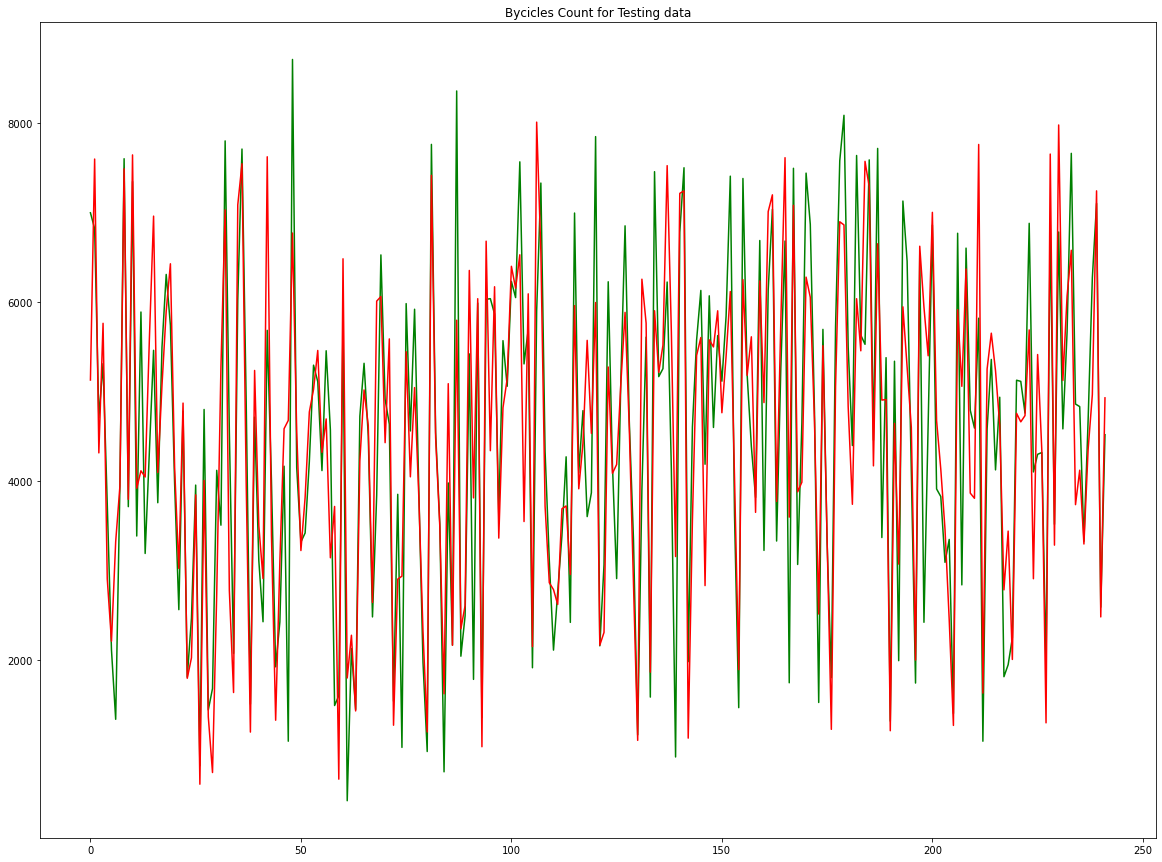

In [21]:
def predict(W, X):
    ypred = np.dot(W, X)

    return ypred

yt = predict(w, xTe)
print(np.shape(yt), np.shape(yTest))
plt.figure(figsize = (20,15))
plt.plot(yTest, 'g')
plt.plot(yt.T, 'r')
plt.title('Bycicles Count for Testing data');

## 4. Measure the total error of the algorthim

Evaluate the model performance for each power of data by using Residual Sum of Square (RSS): $$RSS(w) = \sum_{i=1}^{N} (y_i - x_i w)^2$$

In [24]:
def rss(Y, Yt):
    #r = y - yt
    #cost = np.dot(r, r) / len(y)
    
    cost = np.sum((Y - Yt) ** 2)
    
    return cost

print(np.shape(yTest), np.shape(yt))
costo = 1/len(yTest) * rss(yTest, yt)
print(costo)

(242, 1) (1, 242)
[[921023.026395]]


# 5. Sklearn library for linear regression

1. Using the library for linear regression, obtain the predictions for testing data and calculate the cost function.
2. Determine if this algorithm is better than the closed-form solution formulas, why?

In [142]:
# Homework
'''from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))'''

0.7933310726732483


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit(xTrain, yTrain)

print(reg.score(xTest, yTest))
# reg.predict(xTest)

In [ ]:
W_linear = reg.coef_
print('El coeficiente W es:', W_linear)
print(np.shape(W_linear))
print(reg.intercept_)